# Problema 3
## Model that predicts profit
### El objetivo es saber si se presentaran perdidas

In [2]:
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 11)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 78)
pd.set_option('precision', 3)

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
data=pd.read_excel('dbp3.xlsx')

In [4]:
clasified=list(map(lambda n:data.loc[data['int_rate']==n,:],np.unique(data['int_rate'])))

In [5]:
amounts=list(map(lambda n: np.sum(n.iloc[:,4]),clasified))

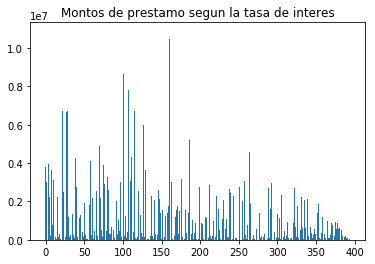

In [6]:
plt.bar(range(len(amounts)),amounts)
plt.title('Montos de prestamo segun la tasa de interes')
plt.show()

### Probabilidad de default dependiento la tasa de interes

In [7]:
default_probability=list(map(lambda n:np.count_nonzero(n.iloc[:,0]<0)/len(n.iloc[:,0]),clasified))

In [8]:
default_probability

[0.019197207678883072,
 0.04390243902439024,
 0.002881844380403458,
 0.2631578947368421,
 0.006711409395973154,
 0.11904761904761904,
 0.1206896551724138,
 0.24429967426710097,
 0.005050505050505051,
 0.08333333333333333,
 0.1967741935483871,
 0.00980392156862745,
 0.020833333333333332,
 0.0,
 1.0,
 0.14327485380116958,
 0.010075566750629723,
 0.34375,
 0.027777777777777776,
 0.14285714285714285,
 1.0,
 0.022865853658536585,
 0.05844980940279543,
 0.023972602739726026,
 0.30851063829787234,
 0.032467532467532464,
 0.8148148148148148,
 0.07008086253369272,
 0.024054982817869417,
 0.0,
 0.35353535353535354,
 0.9230769230769231,
 0.8163265306122449,
 0.9230769230769231,
 0.011235955056179775,
 0.03208556149732621,
 0.8863636363636364,
 0.9411764705882353,
 0.041666666666666664,
 0.004975124378109453,
 0.020066889632107024,
 1.0,
 0.7333333333333333,
 0.9333333333333333,
 0.0851063829787234,
 0.1925133689839572,
 0.9583333333333334,
 0.8695652173913043,
 0.8936170212765957,
 1.0,
 0.035897

### Tasas de interes con 100% de probabilidad de default

In [9]:
np.unique(data['int_rate'])[np.array(default_probability)==1]

array([0.0712, 0.0743, 0.0901, 0.0951, 0.0964, 0.097 , 0.0983, 0.1001,
       0.1028, 0.1033, 0.1064, 0.1096, 0.1109, 0.1122, 0.1128, 0.1154,
       0.1159, 0.1172, 0.1191, 0.1217, 0.1222, 0.1236, 0.1254, 0.1272,
       0.128 , 0.1286, 0.1312, 0.1317, 0.1336, 0.1362, 0.1375, 0.1407,
       0.1412, 0.1438, 0.1443, 0.1457, 0.1467, 0.147 , 0.1475, 0.1488,
       0.1493, 0.1507, 0.1525, 0.1538, 0.1551, 0.1583, 0.1588, 0.1601,
       0.1615, 0.162 , 0.1633, 0.1646, 0.1665, 0.1683, 0.1696, 0.1722,
       0.1728, 0.1741, 0.1746, 0.1759, 0.1772, 0.1778, 0.1791, 0.1836,
       0.1872, 0.1886])

In [10]:
np.arange(len(amounts))[np.array(default_probability)==1]

array([ 14,  20,  41,  49,  52,  54,  56,  62,  67,  68,  77,  86,  89,
        93,  95, 102, 104, 108, 113, 119, 122, 125, 130, 136, 138, 140,
       148, 150, 156, 164, 167, 177, 180, 189, 191, 195, 200, 201, 204,
       209, 211, 215, 220, 226, 228, 236, 237, 242, 247, 248, 252, 256,
       260, 266, 270, 278, 281, 284, 287, 293, 295, 297, 302, 314, 324,
       328])

### Grado del prestamo que tuvo, en una tasa de interes, el 100% de default

In [11]:
loangrades=list(map(lambda n:np.mean(clasified[n].iloc[:,3]),np.arange(len(amounts))[np.array(default_probability)==1]))

In [12]:
loangrades

[1.0,
 2.0,
 7.0,
 7.0,
 9.0,
 6.0,
 8.0,
 7.0,
 11.0,
 8.0,
 9.0,
 10.0,
 12.0,
 14.0,
 11.0,
 15.0,
 12.0,
 14.0,
 13.0,
 17.0,
 14.0,
 16.0,
 15.0,
 14.0,
 19.0,
 16.0,
 20.0,
 17.0,
 16.0,
 20.0,
 22.0,
 23.0,
 20.0,
 24.0,
 21.0,
 23.0,
 25.0,
 25.0,
 22.0,
 24.0,
 21.0,
 23.0,
 22.0,
 24.0,
 26.0,
 27.0,
 24.0,
 26.0,
 28.0,
 25.0,
 27.0,
 29.0,
 28.0,
 27.0,
 29.0,
 33.0,
 30.0,
 32.0,
 29.0,
 31.0,
 33.0,
 30.0,
 32.0,
 35.0,
 33.0,
 35.0]

### Probabilidad de default segun el grado del prestamo

In [13]:
clasified_by_loangrade=list(map(lambda n:data.loc[data['loangrade']==n,:],np.unique(data['loangrade'])))

In [14]:
default_probability_by_loangrade=list(map(lambda n:np.count_nonzero(n.iloc[:,0]<0)/len(n.iloc[:,0]),clasified_by_loangrade))

In [15]:
default_probability_by_loangrade

[0.03590192644483362,
 0.06513157894736842,
 0.10367526055951728,
 0.09225473321858864,
 0.09094163981382027,
 0.09298618490967056,
 0.10175106483672504,
 0.08174841508174842,
 0.09034749034749034,
 0.0883505521909512,
 0.11042402826855123,
 0.09689383402874363,
 0.13027744270205066,
 0.14744525547445256,
 0.139426800929512,
 0.14150047483380818,
 0.09158249158249158,
 0.10287443267776097,
 0.11491228070175438,
 0.0984251968503937,
 0.10520361990950226,
 0.14538558786346398,
 0.1317365269461078,
 0.15579710144927536,
 0.1342685370741483,
 0.1377551020408163,
 0.1396103896103896,
 0.13135593220338984,
 0.12322274881516587,
 0.14935064935064934,
 0.1347517730496454,
 0.102803738317757,
 0.16455696202531644,
 0.31313131313131315,
 0.32558139534883723]

In [22]:
sum(data['profit'])/sum(data['funded_amnt'])


69633724.12999935

In [28]:
#perdida en los creditos default
sum(data.loc[data['profit']<0,:]['profit'])

-17097840.30999998

In [35]:
#porcentaje de default
sum(data['default'])/len(data['default'])

0.10356177265781122

In [39]:
#monto de prestamo en los default
sum(data.loc[data['profit']<0,:]['funded_amnt'])

44998625

In [44]:
np.count_nonzero(-data.loc[data['profit']<0,:]['profit']==data.loc[data['profit']<0,:]['funded_amnt'])/sum(data['default'])

0.039954597048808174

4405